# Amazon UK Products 2023- Exploratory Data Analysis

Analyzed data for 2.2 million Amazon Product dataset containing 7 columns and 2.2 million rows.

Created visualizations (Pie Chart, bar charts, histogram, wordcount, etc.) using Seaborn & Plotly.

Discovered many insights from the amazon product dataset 2023, such as highest selling product category, highest money volume generated product category, bestSeller product count etc.

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading amazon dataset CSV using pandas
df = pd.read_csv("amz_uk_processed_data.csv")

In [3]:
df.head()

asin                                              title  \
0  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...   
1  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...   
2  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...   
3  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...   
4  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/71C3lbbeLs...   
1  https://m.media-amazon.com/images/I/61c5rSxwP0...   
2  https://m.media-amazon.com/images/I/61j3SEUjMJ...   
3  https://m.media-amazon.com/images/I/71yf6yTNWS...   
4  https://m.media-amazon.com/images/I/613dEoF9-r...   

                               productURL  stars  reviews  price  \
0  https://www.amazon.co.uk/dp/B09B96TG33    4.7    15308  21.99   
1  https://www.amazon.co.uk/dp/B01HTH3C8S    4.7    98099  23.99   
2  https://www.amazon.co.uk/dp/B09B8YWXDF    4.7    15308  21.99   
3  https://www.amazon.co.uk/dp/B09B8T5VGV    4.7     7205  31.99   
4  https://www.amazon.co.uk/dp/B09WX6QD65    4.6     1881  17.99   

   isBestSeller  boughtInLastMonth    categoryName  
0         False                  0  Hi-Fi Speakers  
1          True                  0  Hi-Fi Speakers  
2         False                  0  Hi-Fi Speakers  
3         False                  0  Hi-Fi Speakers  
4         False                  0  Hi-Fi Speakers

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB


### Data Preprocessing

In [5]:
#checking duplicate values
df.duplicated().sum()

0

In [6]:
# Select columns
selected_cols = ['stars', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'categoryName', 'title']
df = df[selected_cols]
print(df.shape)

(2222742, 7)


Here we are selecting seven columns from the dataframe to get the insights.

Here are the column names which we are selecting 'stars', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'categoryName', 'title'

In [7]:
#checking null values
df.isnull().sum()

stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
title                0
dtype: int64

There are no null values in dataset and no duplicate.

The data looks clean and we need to analyse this dataset and get insights and visualize the samem

In [8]:
df.describe()

stars       reviews         price  boughtInLastMonth
count  2.222742e+06  2.222742e+06  2.222742e+06       2.222742e+06
mean   2.031870e+00  3.821617e+02  9.425737e+01       1.856902e+01
std    2.185497e+00  5.020752e+03  3.606225e+02       1.919030e+02
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000e+00
25%    0.000000e+00  0.000000e+00  1.000000e+01       0.000000e+00
50%    0.000000e+00  0.000000e+00  1.990000e+01       0.000000e+00
75%    4.400000e+00  4.400000e+01  4.771000e+01       0.000000e+00
max    5.000000e+00  1.356658e+06  1.000000e+05       5.000000e+04

In [9]:
df.head()

stars  reviews  price  isBestSeller  boughtInLastMonth    categoryName  \
0    4.7    15308  21.99         False                  0  Hi-Fi Speakers   
1    4.7    98099  23.99          True                  0  Hi-Fi Speakers   
2    4.7    15308  21.99         False                  0  Hi-Fi Speakers   
3    4.7     7205  31.99         False                  0  Hi-Fi Speakers   
4    4.6     1881  17.99         False                  0  Hi-Fi Speakers   

                                               title  
0  Echo Dot (5th generation, 2022 release) | Big ...  
1  Anker Soundcore mini, Super-Portable Bluetooth...  
2  Echo Dot (5th generation, 2022 release) | Big ...  
3  Echo Dot with clock (5th generation, 2022 rele...  
4  Introducing Echo Pop | Full sound compact Wi-F...

The isBestSeller column data type is boolean

Let's convert this column to int, so that it will be easier for further analysis.

In [10]:
df['isBestSeller'] = df['isBestSeller'].astype(int)

Lets get the unique number of values of the columns 


In [11]:
df['boughtInLastMonth'].unique()

array([    0,   600,  1000,   200,   100,    50,  2000,   800,   900,
         700,   500,   400,   300,  4000,  3000,  5000,  9000,  7000,
        6000, 50000, 20000, 10000,  8000, 30000, 40000], dtype=int64)

In [12]:
df['categoryName'].nunique()

296

### EDA

#### How Many BestSellers ?

Here we are going to display a pie chart which shows the isBestSeller and NotBestSeller percentage.

In [13]:
#Count the occurrences of True and False in the 'isBestSeller' column
is_bestseller_count = df['isBestSeller'].value_counts()

# Create a DataFrame for the pie chart
is_bestseller_data = pd.DataFrame({'isBestSeller': is_bestseller_count.index, 'Count': is_bestseller_count.values})

# Define custom labels
custom_labels = {0: "Not Bestseller", 1: "Bestseller"}

# Replace the values in the DataFrame with custom labels
is_bestseller_data['isBestSeller'] = is_bestseller_data['isBestSeller'].map(custom_labels)

# Create an interactive pie chart with custom labels
fig = px.pie(is_bestseller_data, names='isBestSeller', values='Count', title='BestSeller Count')

# Show the interactive pie chart
fig.show()

The bestSeller products are 0.271 % and NotBestSeller Products are 99.7%.

We have Not BestSeller count is 2216724 and bestSeller count is 6018

#### How much of these bestsellers are responsible for boughtInLastMonth?

Calculate the sum of 'boughtInLastMonth' for isBestSeller == 0 and isBestSeller == 1

In [14]:
sum_bought_in_last_month = df.groupby('isBestSeller')['boughtInLastMonth'].sum()
sum_bought_in_last_month

isBestSeller
0    36235200
1     5038950
Name: boughtInLastMonth, dtype: int64

In [15]:
# Define custom labels
custom_labels = {0: "Non-Bestseller Volume", 1: "Bestseller Volume"}

# Create an interactive pie chart with custom labels
fig = px.pie(
    values=sum_bought_in_last_month,
    names=[custom_labels[i] for i in sum_bought_in_last_month.index],
    title='Sum of boughtInLastMonth by isBestSeller',
    labels={'names': 'isBestSeller', 'values': 'Sum'}
)

# Show the interactive pie chart
fig.show()

We have 87.8 percentage product brought Not BestSeller and 12.2 percentage brought is bestSeller in boughtInLastMonth.

To see more hover the pie chart to get the counts.


#### Calculate total sales performance (boughtInLastMonth) ?

Here we are going to group the data by Product category Name and calculating the Sales Performance.bold text

In [16]:
category_sales = df.groupby('categoryName')['boughtInLastMonth'].sum().reset_index()
category_sales

categoryName  boughtInLastMonth
0                       3D Printers                650
1            3D Printing & Scanning               2050
2     Abrasive & Finishing Products               4800
3                    Action Cameras                  0
4                          Adapters                250
..                              ...                ...
291                Wind Instruments               3750
292               Window Treatments              12450
293                           Women             355600
294  Women's Sports & Outdoor Shoes               2000
295     eBook Readers & Accessories                  0

[296 rows x 2 columns]

In [17]:
#Lets display the boughtInLastMonth values in descending order to find max values in order

category_sales = category_sales.sort_values(by='boughtInLastMonth', ascending=False)
category_sales

categoryName  boughtInLastMonth
126       Health & Personal Care            8282750
109                      Grocery            4320950
221                 Pet Supplies            3231200
251                    Skin Care            2095500
266       Storage & Organisation            1796900
..                           ...                ...
138           Home Entertainment                  0
133                 Hockey Shoes                  0
121    Handmade Kitchen & Dining                  0
108               Graphics Cards                  0
295  eBook Readers & Accessories                  0

[296 rows x 2 columns]

In [18]:
#Lets get the count of top 20 sales in last month
top_20_category_sales = category_sales.nlargest(20, 'boughtInLastMonth')
top_20_category_sales

categoryName  boughtInLastMonth
126            Health & Personal Care            8282750
109                           Grocery            4320950
221                      Pet Supplies            3231200
251                         Skin Care            2095500
266            Storage & Organisation            1796900
8                       Arts & Crafts            1048900
176                           Make-up            1009700
210                   Office Supplies             968900
209             Office Paper Products             862450
9                                Baby             771000
20                             Beauty             744200
16                        Bath & Body             698600
220  Pens, Pencils & Writing Supplies             647550
102                         Gardening             635250
123                          Hardware             607050
262                 Sports & Outdoors             606200
177      Manicure & Pedicure Products             555750
253          Small Kitchen Appliances             534450
40               Cables & Accessories             473550
25               Beer, Wine & Spirits             472550

#Lets draw a bar chart to visulize and get insight of top 20 product category Name and higest sale performance using bar chart.


In [19]:
fig = px.bar(top_20_category_sales, x='categoryName', y='boughtInLastMonth',
             labels={'categoryName': 'Category', 'boughtInLastMonth': 'Total Sales (in Last Month)'},
             text='boughtInLastMonth', title='Top 20 Product Categories by Sales', color="categoryName",
            )

fig.update_traces(texttemplate='%{text}', textposition='outside') # Customize the appearance of the text labels

fig.update_layout(width=2000, height=600) 

fig.update_xaxes(tickangle=-45) # Rotate x-axis labels for better visibility

fig.show()


Here we can see the top selling product category name and sold in last month.

The top product categeory Name is Healthh and Personal Care, Grocery, pet Supplies , Skin Care and so on...

Here we can easily identify UK people buying most Items Health and Personal Care Items buy analysing Amazon dataset.

#### Calculate money volume for each product.?
Here we are going to calculate the money volume for each product which bought on Amazon UK -To calculate the money volume we need use the following formula. price * boughtInLastMonth which gives the money volume of the particular product.

In [20]:
# Calculate money volume for each product
df['moneyVolume'] = df['price'] * df['boughtInLastMonth']

# Group the data by 'categoryName' and calculate the total money volume for each category
category_money_volume = df.groupby('categoryName')['moneyVolume'].sum().reset_index()

category_money_volume

categoryName  moneyVolume
0                       3D Printers     107595.5
1            3D Printing & Scanning      40117.0
2     Abrasive & Finishing Products      44039.5
3                    Action Cameras          0.0
4                          Adapters       2197.5
..                              ...          ...
291                Wind Instruments      34129.0
292               Window Treatments     146400.0
293                           Women    4251123.5
294  Women's Sports & Outdoor Shoes      39846.5
295     eBook Readers & Accessories          0.0

[296 rows x 2 columns]

Now lets Sort the product categories by money volume in descending order and select the top 20 product category and money volume count.

In [21]:
# Sort the categories by money volume in descending order and select the top 20

top_20_categories_by_money_volume = category_money_volume.nlargest(20, 'moneyVolume')

top_20_categories_by_money_volume

categoryName  moneyVolume
126          Health & Personal Care   99071975.0
221                    Pet Supplies   47098959.5
109                         Grocery   46753181.0
266          Storage & Organisation   26772409.5
251                       Skin Care   22154166.5
253        Small Kitchen Appliances   19603067.5
216                PC & Video Games   18246822.5
9                              Baby   15141262.5
287             Vacuums & Floorcare   14483859.5
262               Sports & Outdoors   13191896.5
25             Beer, Wine & Spirits   10706173.0
20                           Beauty   10291853.0
232          Printers & Accessories    9205851.0
8                     Arts & Crafts    8829951.0
127  Heating, Cooling & Air Quality    8397394.0
210                 Office Supplies    8285410.5
176                         Make-up    8037306.5
102                       Gardening    7818839.0
166                Large Appliances    7176300.5
36     Building & Construction Toys    6728248.5

In [22]:
# Create an interactive bar chart
fig = px.bar(top_20_categories_by_money_volume, x='categoryName', y='moneyVolume',
             labels={'categoryName': 'Category', 'moneyVolume': 'Money Volume (£)'},
             text='moneyVolume', title='Top 20 Categories by Money Volume', color="categoryName"
            )

fig.update_traces(texttemplate='%{text}', textposition='outside')  # Customize the appearance of the text labels

fig.update_layout(width=2000, height=600) 

fig.update_xaxes(tickangle=-45)  # Rotate x-axis labels for better visibility

fig.show()

#### Calculate the total money volume for the whole dataset

In [23]:
# Calculate the total money volume for the whole dataset
total_money_volume = (df['price'] * df['boughtInLastMonth']).sum()

# Format the total money volume with a thousand separator and currency symbol
formatted_total_money_volume = f"£{total_money_volume:,.2f}"

print(f"Total Money Volume for the Entire Dataset: {formatted_total_money_volume}")

Total Money Volume for the Entire Dataset: £600,089,707.00


#### Identifying top Rated Products by Top 20 Categories with reviwes above 25000

In [24]:
# Average reviews of the products
average_reviews = df['reviews'].mean()
print(f'Average number of reviews: {average_reviews:.2f}')

Average number of reviews: 382.16


In [25]:
# Filter the products with at least 25000 reviews

filtered_df = df[df['reviews'] >= 25000]
filtered_df.head(5)

stars  reviews  price  isBestSeller  boughtInLastMonth    categoryName  \
1     4.7    98099  23.99             1                  0  Hi-Fi Speakers   
7     4.7   103673  39.99             0                  0  Hi-Fi Speakers   
8     4.7    29909  29.99             0                  0  Hi-Fi Speakers   
21    4.8    59668  34.80             0                  0  Hi-Fi Speakers   
29    4.7    29387  39.98             0                600  Hi-Fi Speakers   

                                                title  moneyVolume  
1   Anker Soundcore mini, Super-Portable Bluetooth...          0.0  
7   Anker Soundcore 2 Portable Bluetooth Speaker w...          0.0  
8   Bluetooth Speaker, Anker Soundcore Speaker Upg...          0.0  
21  JBL GO 3 - Wireless Bluetooth portable speaker...          0.0  
29  Upgraded, Anker Soundcore Boost Bluetooth Spea...      23988.0

In [26]:
# Filter the products within the top 20 categories


filtered_df = filtered_df[filtered_df['categoryName'].isin(top_20_category_sales['categoryName'])]
filtered_df.head(5)


stars  reviews  price  isBestSeller  boughtInLastMonth categoryName  \
25125    4.5    25375   4.00             0                  0     Hardware   
25127    4.5    28133   3.00             1                  0     Hardware   
25128    4.5    30710   9.49             0                  0     Hardware   
25129    4.5    49140   4.00             0                  0     Hardware   
25131    4.5    31287  11.09             0                  0     Hardware   

                                                   title  moneyVolume  
25125  Loctite Super Glue Power Gel, Flexible Super G...          0.0  
25127  Command Medium Designer Hook, Pack of 2 Hooks ...          0.0  
25128  Command Picture & Frame Hanging Strips Value P...          0.0  
25129  Command 17026CLR Decorating Clips, Pack of 20 ...          0.0  
25131  Command Picture Hanging Strips, Value Pack - 8...          0.0

In [27]:
# Group the filtered DataFrame by category and find the product with the highest rating in each category

top_rated_products = filtered_df.groupby('categoryName').apply(lambda x: x[x['stars'] == x['stars'].max()])
top_rated_products.head(5)

stars  reviews  price  isBestSeller  boughtInLastMonth  \
categoryName                                                                    
Arts & Crafts 2016400    4.7    48194   8.99             0                300   
              2017969    4.7    33142  15.99             0                  0   
Baby          1115405    4.8    39923  20.30             0                  0   
              2041950    4.8    28890   6.99             0                300   
              2043747    4.8    28513  11.95             0                100   

                        categoryName  \
categoryName                           
Arts & Crafts 2016400  Arts & Crafts   
              2017969  Arts & Crafts   
Baby          1115405           Baby   
              2041950           Baby   
              2043747           Baby   

                                                                   title  \
categoryName                                                               
Arts & Crafts 2016400  YRYM HT 3 Pack Teflon Sheet for Heat Press Tra...   
              2017969  LIVINGO Premium Dressmaking Scissors Heavy Dut...   
Baby          1115405  Toddlers and Baby Boys' Swimsuit Trunk and Ras...   
              2041950  Philips Avent Natural Teat, 6 Months+, Fast Fl...   
              2043747  Babymoov Babybols Airtight Baby Food Storage C...   

                       moneyVolume  
categoryName                        
Arts & Crafts 2016400       2697.0  
              2017969          0.0  
Baby          1115405          0.0  
              2041950       2097.0  
              2043747       1195.0

In [28]:
# Sort the top_rated_products DataFrame by 'reviews' in ascending order within each category
top_rated_products = top_rated_products.reset_index(drop=True)

sorted_top_rated_products = top_rated_products.sort_values(by='stars', ascending=False).groupby('categoryName').head(1)

In [29]:
# Create an interactive bar chart
fig = px.bar(sorted_top_rated_products, x='categoryName', y='stars', text='title',
             title='Top Rated Products by Top 20 Categories (Minimum 25000 Reviews) - Highest Number of Reviews',
             labels={'categoryName': 'Category', 'stars': 'Rating'}, color="title",
             hover_data=["stars", "reviews", "price", "isBestSeller", "boughtInLastMonth"]
             )

fig.update_traces(texttemplate='%{text}', textposition='outside') # Customize the appearance of the text labels

fig.update_layout(width=2000, height=600) 

fig.update_xaxes(tickangle=-45) # Rotate x-axis labels for better visibility


fig.show()

Here we can visualize and get top insight of the Amazon Products.

Such as the top rated products, category and ratings above 25000.

We can now easily see the list of products, product categories which is  higly rated by UK Amazon Customers.

#### Identify top 20 Products brought in last month across all product category.?

Here we are getting insight of the top 20 product across all product categories .


In [30]:
# Sort the DataFrame by 'boughtInLastMonth' in descending order and select the top 20 products
top_20_products_bought_in_last_month = df.nlargest(20, 'boughtInLastMonth')
top_20_products_bought_in_last_month.head(5)

stars  reviews  price  isBestSeller  boughtInLastMonth  \
205639     4.7    31204  14.99             0              50000   
1557617    4.6    44511  22.22             0              50000   
1252283    4.7    32294  12.60             0              40000   
995347     4.4    52463   8.75             0              30000   
1557618    4.8    40648  14.99             1              30000   

                   categoryName  \
205639             Pet Supplies   
1557617                 Grocery   
1252283  Health & Personal Care   
995347                  Make-up   
1557618                 Grocery   

                                                     title  moneyVolume  
205639                       Catsan Hygiene Cat Litter 20L     749500.0  
1557617  Andrex Gentle Clean Toilet Rolls - 45 Toilet R...    1111000.0  
1252283  Amazon Brand – Mama Bear Sensitive Unscented B...     504000.0  
995347   Maybelline New York Lash Sensational Sky High ...     262500.0  
1557618  Regina Blitz Household Towel, 560 Super-Sized ...     449700.0

In [31]:
fig = px.bar(top_20_products_bought_in_last_month, x='categoryName', y='boughtInLastMonth',
             title='Top 20 Products by Bought in Last Month',
             labels={'title': 'Product Title', 'boughtInLastMonth': 'Bought in Last Month'},
             text='boughtInLastMonth', color="title",
             hover_data=["stars", "reviews", "price", "isBestSeller"]
            )
fig.update_layout(width=2000, height=600) 

fig.update_xaxes(tickangle=-45) # Rotate x-axis labels for better visibility

fig.show()

#### Count the number of products in each category.?
    
Lets group the data by product category Name and the count the number of products in each categeory.



In [32]:
# Group the data by 'categoryName' and count the number of products in each category

category_counts = df['categoryName'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
category_counts.head(10)

Category   Count
0                       Sports & Outdoors  826076
1                               Skin Care   18755
2                              Fragrances   18563
3                                 Make-up   18453
4            Manicure & Pedicure Products   17212
5  Handmade Clothing, Shoes & Accessories   16707
6                                     Men   16384
7                                   Women   16284
8                          Handmade Gifts   15790
9                        Handmade Artwork   15297

In [33]:
# Create an interactive pie chart
fig = px.pie(category_counts.head(20), names='Category', values='Count', title='Number of Products in Each Category')

# Show the interactive pie chart
fig.show()

#### Distribution of Ratings - All Products

Here we are going to visulize the distribution of Rating for all the products.

Here we are exluding the rating 0 to get more accuracy.

In [34]:
# Filter the DataFrame to exclude products with 0 reviews
df_filtered = df[df['reviews'] > 0]

In [35]:
# Count the occurrences of each star rating in the filtered DataFrame

star_counts = df_filtered['stars'].value_counts().sort_index().reset_index()
star_counts.columns = ['Stars', 'Count']


In [36]:
# Create an interactive bar chart
fig = px.bar(star_counts, x='Stars', y='Count', text='Count',
             title='Distribution of Star Ratings (Excluding Products with 0 Reviews)',
             labels={'Stars': 'Star Rating', 'Count': 'Count'},
            color='Stars',
            )
# Set the x-axis to include all possible star ratings
fig.update_xaxes(type='category')

fig.show()

By looking at the graph we can easily identify the most rating are between 4.3 to 4.6 for most of the products.

#### Distriubtion of Star Rating in Sports and Outdoor Product Category.

From the previous graph we identified the highest sold products is sports and outdoor category.

Lets pick this and see the distributed rating for the Sport and Outdoor Product Category.

In [37]:
# Filter the DataFrame to include only products in the "Sports & Outdoors" category
sports_outdoors_df = df_filtered[df_filtered['categoryName'] == 'Sports & Outdoors']

# Count the occurrences of each star rating in the filtered DataFrame
star_counts = sports_outdoors_df['stars'].value_counts().sort_index().reset_index()
star_counts.columns = ['Stars', 'Count']

# Create an interactive bar chart for the "Sports & Outdoors" category
fig = px.bar(star_counts, x='Stars', y='Count', text='Count',
             title='Distribution of Star Ratings in Sports & Outdoors Category',
             labels={'Stars': 'Star Rating', 'Count': 'Count'},
            color='Stars',
            )

fig.update_traces(texttemplate='%{text}', textposition='outside')  # Display counts as text

# Set the x-axis to include all possible star ratings
fig.update_xaxes(type='category')

# Show the interactive plot
fig.show()

We can see the most product fall in rating of 4.5 to 5 with higest count.

Similarly we can view the distribution of start rating of second higest sold product grocery.

In [38]:
#Filter the DataFrame to include only products in the "Grocery" category
grocery_df = df_filtered[df_filtered['categoryName'] == 'Grocery']

# Count the occurrences of each star rating in the filtered DataFrame
star_counts = grocery_df['stars'].value_counts().sort_index().reset_index()
star_counts.columns = ['Stars', 'Count']

# Create an interactive bar chart for the "Grocery" category
fig = px.bar(star_counts, x='Stars', y='Count', text='Count',
             title='Distribution of Star Ratings in Grocery Category',
             labels={'Stars': 'Star Rating', 'Count': 'Count'},
            color='Stars',
            )

fig.update_traces(texttemplate='%{text}', textposition='outside')  # Display counts as text

# Set the x-axis to include all possible star ratings
fig.update_xaxes(type='category')

# Show the interactive plot
fig.show()

#### Visualize the word cloud of product category.

Here we can visualize the most frequent occured words in big size using word cloud .

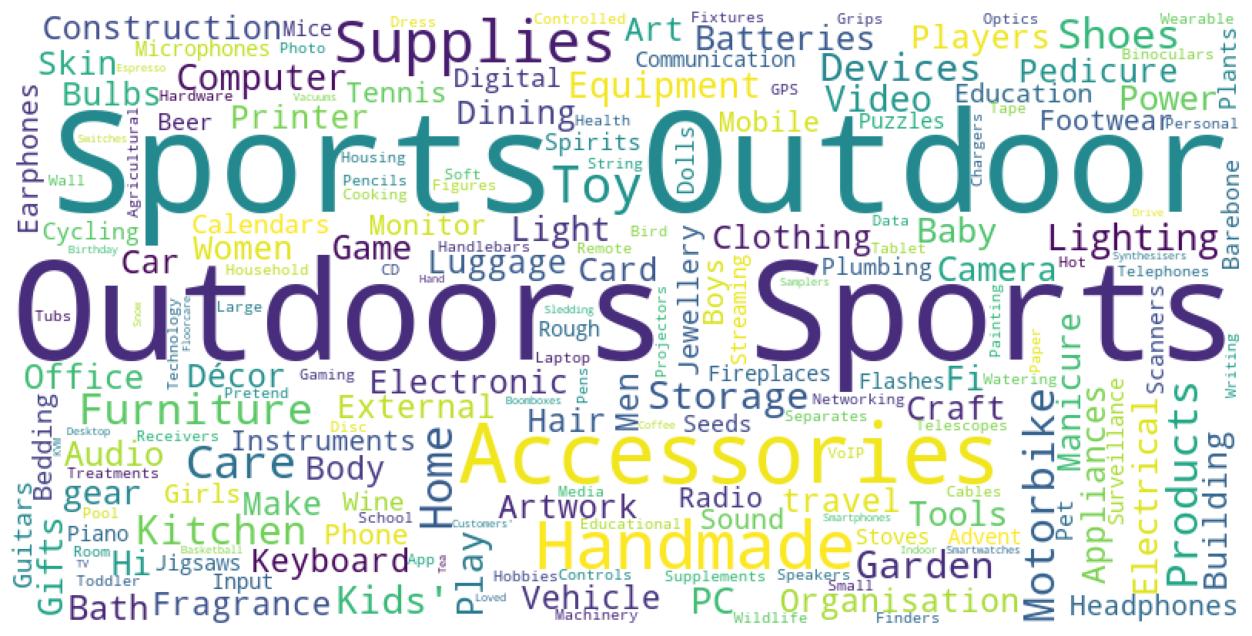

In [39]:
from wordcloud import WordCloud
words = ' '.join((job for job in df.categoryName.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);



### Inferences and Conclusions

We've drawn many inferences from the Amazon UK Product dataset 2023 . Here's a summary of a few of them:

Based on the amazon dataset isBestSeller, How many bestSelllers ?we can infer that the we have very less number of bestSeller Products compare to Not bestSelller products throughout all the product category.

We identified the top selling products categories based on boughtInLastMonth information. We identified the top sold product in UK on amazon is health and personal category. Also we have rest 19 product categories which got sold in last month.

A significant volume of money collected from the product category Health and personal care, then pet supplies, grocery, storage and orgnization and so on. We are able to identify the top 20 product categories where the highest amount is being generated in the last month sale.

Highly rated products within the top 20 product categories with reviews above 25000 are Glatol laser hair removal, etc.

We are able to identify the Highest products people bought on amazon across all product categori
es in last month.

We are able to identify the number of products in each category of products.

The most of the products across all the categories on amazon has a star rating between 4.3 to 4.6.

The highest category of the product on amazon is Sports and Outdoor and these products higest rating is beween 4.5 to 5.

The most frequent word used in the product category column is Sports and Outdoor it means amazon having the sports and Outoor sellers more.